In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
d=pd.read_csv("histDense169.csv")
d1=pd.read_csv("histDense169-1.csv")
d2=pd.read_csv("histDense169-2.csv")
d3=pd.read_csv("histDense169-3.csv")
d4=pd.read_csv("histDense169-4.csv")
m=pd.read_csv("histMobile.csv")
m1=pd.read_csv("histMobile-1.csv")
m2=pd.read_csv("histMobile-2.csv")
m3=pd.read_csv("histMobile-3.csv")
m4=pd.read_csv("histMobile-4.csv")
x=pd.read_csv("histX.csv")
x1=pd.read_csv("histX-1.csv")
x2=pd.read_csv("histX-2.csv")
x3=pd.read_csv("histX-3.csv")
x4=pd.read_csv("histX-4.csv")

D=(d+d1+d2+d3+d4)/5
M=(m+m1+m2+m3+m4)/5
X=(x+x1+x2+x3+x4)/5


Ds=pd.concat([d,d1,d2,d3,d4])
Ds=Ds.reset_index(drop=True)
Ms=pd.concat([m,m1,m2,m3,m4])
Ms=Ms.reset_index(drop=True)
Xs=pd.concat([x,x1,x2,x3,x4])
Xs=Xs.reset_index(drop=True)

In [26]:
a=Ds.groupby(["Unnamed: 0"])["val_categorical_accuracy"].max()
b=Ms.groupby(["Unnamed: 0"])["val_categorical_accuracy"].max()
c=Xs.groupby(["Unnamed: 0"])["val_categorical_accuracy"].max()

In [4]:
def smooth(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

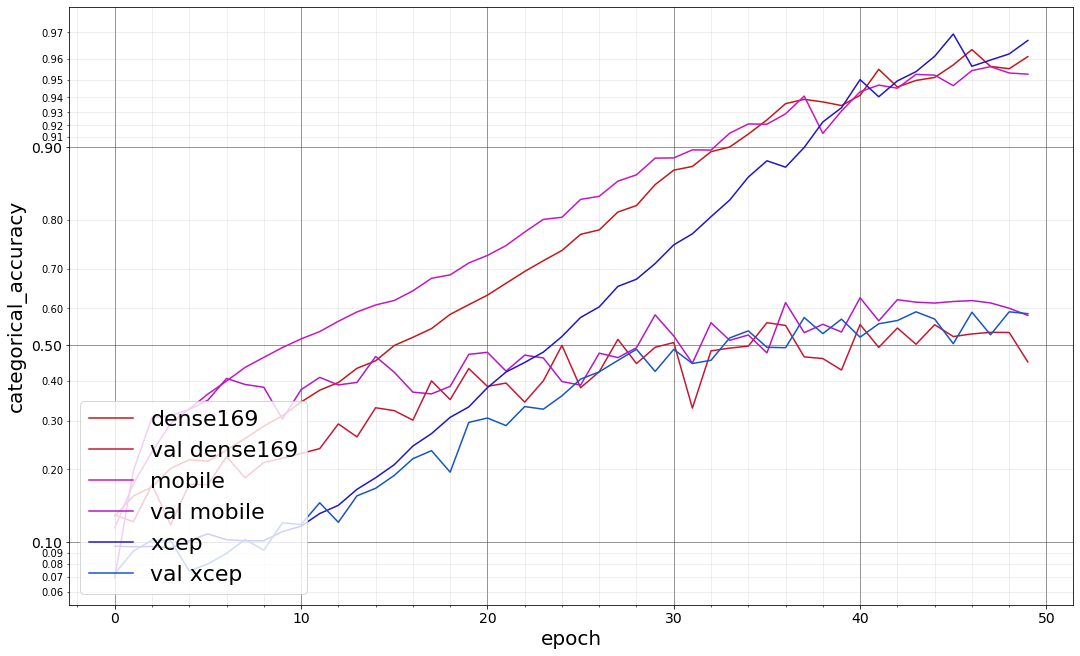

In [10]:
fig,ax=plt.subplots(figsize=(18,11))
ax.tick_params(labelsize=14)

k="categorical_accuracy"
#plt.plot(smooth(D[k]),color="#c71616")
plt.plot(D[k],color="#c71616")
#plt.plot(smooth(D['val_loss']),color="#c71634")
plt.plot(D['val_'+k],color="#c71634")

#plt.plot(smooth(M[k]))
plt.plot(M[k],color="#c716c1")
#plt.plot(smooth(M['val_loss']))
plt.plot(M['val_'+k],color="#b516c7")

#plt.plot(smooth(X[k]))
plt.plot(X[k],color="#1f16c7")
#plt.plot(smooth(X['val_loss']))
plt.plot(X['val_'+k],color="#1654c7")

plt.ylabel(k,fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.grid(b=True, which='major', color='#444444', linestyle='-',alpha=0.7)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#plt.xlim(0,50)
#plt.ylim(0.02,15)
plt.yscale("logit")
plt.legend(['dense169','val dense169','mobile','val mobile','xcep','val xcep'], loc='lower left', fontsize=22)
plt.show()

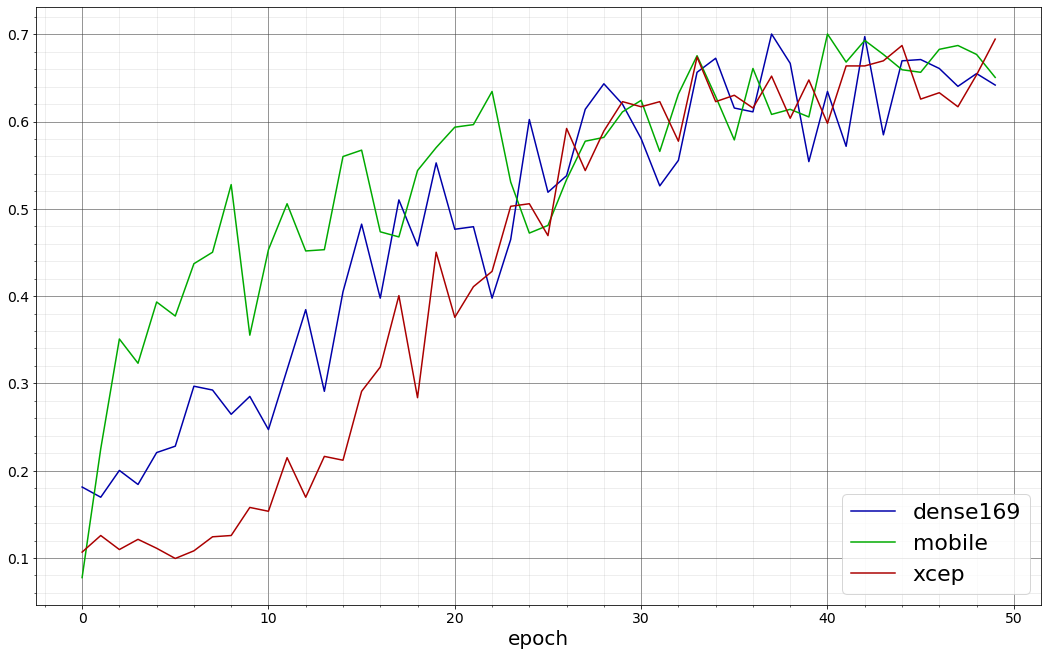

In [30]:
fig,ax=plt.subplots(figsize=(18,11))
ax.tick_params(labelsize=14)

#plt.plot(smooth(D[k]),color="#c71616")
plt.plot(a,color="#0000AA")
plt.plot(b,color="#00AA00")
plt.plot(c,color="#AA0000")
#plt.ylabel(k,fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.grid(b=True, which='major', color='#444444', linestyle='-',alpha=0.7)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#plt.xlim(0,50)
#plt.ylim(0.02,15)
#plt.yscale("logit")
plt.legend(['dense169','mobile','xcep'], loc='lower right', fontsize=22)
plt.show()

In [52]:
!nvidia-smi

Thu Nov  7 12:53:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.183      Driver Version: 384.183      CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:06:00.0 Off |                    0 |
| N/A   34C    P0    43W / 300W |     10MiB / 16152MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:07:00.0 Off |                    0 |
| N/A   33C    P0    41W / 300W |     10MiB / 16152MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T